# Wikipedia Text Segmentation

This notebook analyzes the words of a chinese wikipedia article

The most viewed chineze wikipedia articles of 2019 are described here:

https://pageviews.toolforge.org/topviews/?project=zh.wikipedia.org&platform=all-access&date=last-year&excludes=

The article "六四事件" (1989 Tiananmen Square protests/ Tiananmen Square massacre) is the most viewed article of 2019 with 4.196.884 hits.

In [1]:
from bigchina.analyzer import segment_wikipedia_article

In [2]:
tiananmen = segment_wikipedia_article(title="六四事件", language="zh")
tiananmen

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,六四,numeral,False,0,0
1,事件,noun,False,0,1
2,，,punctuation mark,True,1,0
3,又,conjunction,False,1,1
4,稱,noun,False,1,2
...,...,...,...,...,...
27950,War],noun,False,11588,2
27951,Template,noun,False,11588,3
27952,:,punctuation mark,True,11589,0
27953,Authority,noun,False,11589,1


In [3]:
# most viewed article in 2018, tv series: Story of Yanxi Palace
yanxi = segment_wikipedia_article(title="延禧攻略")
yanxi

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,《,punctuation mark,True,0,0
1,延禧,noun,False,0,1
2,攻,verb,False,0,2
3,略,adverb,False,0,3
4,》,punctuation mark,True,2,0
...,...,...,...,...,...
2997,節,punctuation mark,True,1048,0
2998,目的,noun,False,1048,1
2999,變,punctuation mark,True,1049,0
3000,遷,punctuation mark,True,1050,0


In [4]:
tiananmen.characteristic.value_counts()

punctuation mark        11589
noun                     4708
verb                     4186
particle                 1138
adverb                   1005
preposition               968
numeral                   736
adjective                 620
conjunction               585
noun of locality          552
time word                 538
pronoun                   412
classifier                403
distinguishing word       235
locative word              56
multiword expression       25
suffix                     15
modal particle             14
onomatopoeia                1
Name: characteristic, dtype: int64

Most characters are punctuation marks. Since they are not interesting for now they can be filtered out:

In [5]:
tiananmen[tiananmen.characteristic == "punctuation mark"].segment.unique()

array(['，', '、', '。', '（', '）', '“', '”', '時', '會', '簡', '稱', '「', '」',
       '運', '動', '據', '過', '發', '門', '廣', '場', '習', '慣', '國', '軍', '進',
       '駐', '議', '眾', '離', '隊', '執', '務', '陸', '區', '將', '鎮', '壓', '殺',
       '產', '黨', '華', '數', '個', '並', '漸', '對', '響', '剛', '際', '為', '亂',
       '結', '風', '當', '衝', '續', '這', '類', '語', '經', '：', '聞', '體', '詞',
       '關', '報', '導', '則', '減', '絕', '讓', '許', '現', '內', '尋', '開', '論',
       '壇', '繞', '網', '審', '羅', '馬', '寫', '隨', '傳', '視', '彙', '屆', '復',
       '鄧', '總', '參', '謀', '長', '職', '獲', '權', '員', '擔', '書', '記', '處',
       '鋒', '趙', '陽', '領', '層', '儘', '濟', '歡', '敗', '帶', '係', '憂', '斷',
       '來', '價', '機', '穩', '較', '製', '誘', '採', '雙', '軌', '購', '販', '貨',
       '幣', '應', '廠', '無', '潤', '；', '貸', '兌', '礎', '鬆', '間', '買', '積',
       '週', '銷', '闖', '顯', '臨', '膨', '脹', '問', '題', '費', '業', '擁', '與',
       '鐵', '飯', '設', '識', '揮', '實', '學', '額', '況', '計', '劃', '農', '輕',
       '資', '專', '須', '條', '績', '質', '該', '慘', '們', '認', '憑', '決

In [6]:
len(tiananmen.segment.unique())

3364

In [7]:
tiananmen.tail(20)

,segment,characteristic,is_punctuation,sentence,sentence_word_id
27930,参考,verb,False,11585,2
27931,文献,noun,False,11585,3
27933,==,numeral,False,11585,4
27934,==,numeral,False,11585,5
27936,相关,verb,False,11585,6
27937,阅读,verb,False,11585,7
27939,==,numeral,False,11585,8
27940,==,numeral,False,11585,9
27942,外部,noun of locality,False,11585,10
27943,連,punctuation mark,True,11586,0


In [8]:
tiananmen[tiananmen.characteristic != "punctuation mark"]

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,六四,numeral,False,0,0
1,事件,noun,False,0,1
3,又,conjunction,False,1,1
4,稱,noun,False,1,2
5,六四,numeral,False,1,3
...,...,...,...,...,...
27949,[Cold,None,False,11588,1
27950,War],noun,False,11588,2
27951,Template,noun,False,11588,3
27953,Authority,noun,False,11589,1


In [9]:
tiananmen[tiananmen.characteristic.isnull()]

,segment,characteristic,is_punctuation,sentence,sentence_word_id
2675,。,None,False,997,10
2760,。,None,False,1009,11
2928,。,None,False,1051,9
2966,。,None,False,1064,7
3074,。,None,False,1077,6
3130,。,None,False,1085,5
27949,[Cold,None,False,11588,1


<AxesSubplot:xlabel='characteristic'>

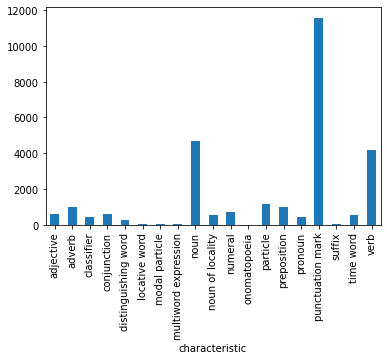

In [10]:
tiananmen.groupby("characteristic")["segment"].count().plot.bar()

<AxesSubplot:xlabel='characteristic'>

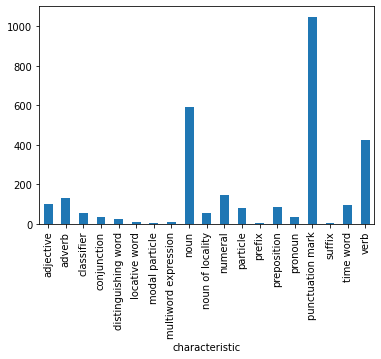

In [11]:
yanxi.groupby("characteristic")["segment"].count().plot.bar()

The distrubution of both articles looks very similar. Does this also apply to the most common words?

In [12]:
tiananmen = tiananmen[tiananmen.characteristic != "punctuation mark"]

tiananmen.segment.value_counts().head(15)

的     947
在     385
中     328
生     253
後     190
有     161
和     154
而     154
大     137
人     136
事件    128
行     118
也     118
且     116
了     115
Name: segment, dtype: int64

In [13]:
yanxi = yanxi[yanxi.characteristic != "punctuation mark"]

yanxi.segment.value_counts().head(20)

的      68
延禧     38
攻      33
略      33
在      32
==     28
===    22
是      19
中      17
一      17
拍      15
集      13
收      13
上      13
於      12
等      11
影      11
作      11
播放     10
皇后      9
Name: segment, dtype: int64

In both articles the word "的" is the most frequently used one.
The word "在" is similarly often used. The other words have a pretty similar distrubution.

To get a better result, alot of wikipedia articles should be accumulated and then analyzed together.

## Uniqueness over time

to get the number of unique words over time the following transformation has to be performed:



In [14]:
from bigchina.analyzer import rolling_unique_count

yanxi.reset_index(drop=True, inplace=True)
yanxi = rolling_unique_count(yanxi, "segment")

In [15]:
yanxi

,segment,characteristic,is_punctuation,sentence,sentence_word_id,rolling_unique_segment_count
0,延禧,noun,False,0,1,1
1,攻,verb,False,0,2,2
2,略,adverb,False,0,3,3
3,英,distinguishing word,False,3,1,4
4,Story,noun,False,5,1,5
...,...,...,...,...,...,...
1872,简体,distinguishing word,False,1044,1,793
1873,中文,noun,False,1044,2,794
1874,==,numeral,False,1045,1,794
1875,目的,noun,False,1048,1,795


In [16]:
yanxi[yanxi.segment == "巧妙"]

,segment,characteristic,is_punctuation,sentence,sentence_word_id,rolling_unique_segment_count
1123,巧妙,adjective,False,729,2,540


<AxesSubplot:xlabel='index'>

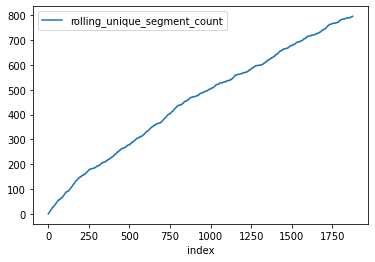

In [17]:
yanxi.reset_index().plot(x='index', y='rolling_unique_segment_count')

<AxesSubplot:xlabel='index'>

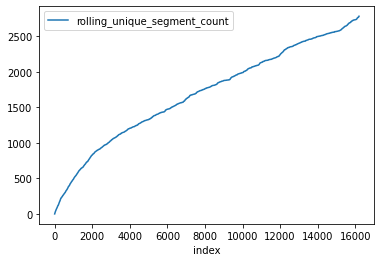

In [18]:
tiananmen.reset_index(drop=True, inplace=True)
tiananmen = rolling_unique_count(tiananmen, "segment")
tiananmen.reset_index().plot(x='index', y='rolling_unique_segment_count')


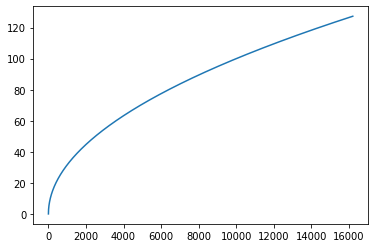

In [19]:
import numpy
import matplotlib.pyplot as plt
square_roots =  numpy.sqrt(tiananmen.index)

plt.plot(tiananmen.index, square_roots)

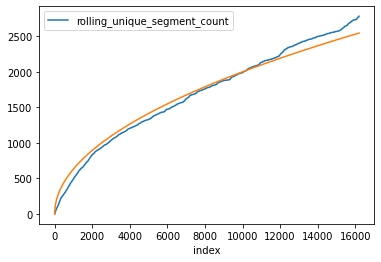

In [20]:
tiananmen.reset_index().plot(x='index', y='rolling_unique_segment_count')
plt.plot(tiananmen.index, square_roots*20)

As it seems the number of unique words over time can be approximated by a square root function!

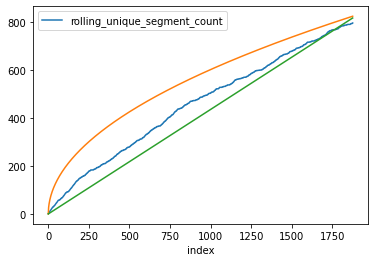

In [21]:
yanxi.reset_index().plot(x='index', y='rolling_unique_segment_count')
plt.plot(yanxi.index, numpy.sqrt(yanxi.index)*19)
plt.plot(yanxi.index, yanxi.index/2.3)

Here, the curve is more linear than anything else.

## Top 100 Articles of 2018

Now, to get a bigger text to analyze, the most viewed wikipedia articles of the year 2018 will be downloaded and segmented.



In [22]:
from bigchina.crawler import crawl_wikipedia_articles

df_2018 = crawl_wikipedia_articles(year=2018, max_rank=8)

Retrieving top 8 zh wikipedia pages of year 2018...


In [23]:
df_2018[:10]

,article,views,mobile_percentage,rank,year,article_content
0,延禧攻略,10585341,66.24,1,2018,《延禧攻略》（英語：Story of Yanxi Palace）是一部2018年中國古裝劇，...
1,Wiki,7845062,6.62,2,2018,Wiki（/ˈwɪkiː/）是在全球資訊網上開放，且可供多人協同創作的超文本系統，由沃德·坎...
2,維基媒體基金會,5641938,0.04,3,2018,维基媒体基金会（英語：Wikimedia Foundation，简称WMF），简称维基媒体（...
3,如懿傳,4892386,61.73,4,2018,《如懿傳》 ，是一部根據流瀲紫小說《後宮如懿傳》所改編的中國古裝宮鬥電視劇，由導演汪俊所執導...
4,金家好媳婦,3887040,64.94,5,2018,《金家好媳婦》為三立電視2018年製播的八點檔台劇，新路山傳播製作，劇集從2017年11月1...
5,乾隆帝,3652575,71.43,6,2018,乾隆帝（1711年9月25日－1799年2月7日），爱新觉罗氏，名弘曆（满语： ᡥᡠᠩ ᠯᡳ...
6,2018年國際足協世界盃,2609384,51.19,7,2018,2018年國際足協世界盃為第21屆國際足協世界盃的賽事，於2018年6月14日至7月15日在...
7,韓國瑜,2520880,55.41,8,2018,韓國瑜（1957年6月17日－），中華民國政治人物，中國國民黨籍，生於臺北縣板橋市（今新北市...


In [24]:
from bigchina.analyzer import segment_text
text = ". ".join(df_2018["article_content"])
df = segment_text(text)

In [25]:
df

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,《,punctuation mark,True,0,0
1,延禧,noun,False,0,1
2,攻,verb,False,0,2
3,略,adverb,False,0,3
4,》,punctuation mark,True,2,0
...,...,...,...,...,...
32422,韓,punctuation mark,True,12478,0
32423,國,punctuation mark,True,12479,0
32424,瑜,noun,False,12479,1
32425,頻,punctuation mark,True,12480,0


<AxesSubplot:xlabel='index'>

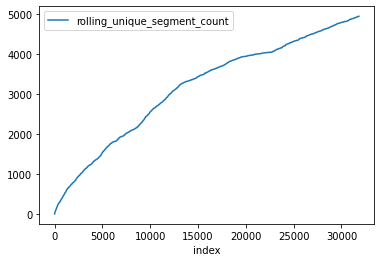

In [26]:
df = rolling_unique_count(df, "segment")
df.reset_index().plot(x='index', y='rolling_unique_segment_count')